In [6]:
%matplotlib inline

In [7]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data

import xarray as xr
import numpy as np

In [8]:
dc = Datacube()

In [9]:
dc.list_products()

,name,description,label,product_type,creation_time,platform,lat,time,format,instrument,lon,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
6,acid,Acid Soil,None,acid,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"
19,dem,"Digital elevation model, 5m",None,dem,None,None,None,None,GeoTIFF,None,None,NaN,NaN,NaN,NaN
1,dlcd,DLCD,None,dlcd,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(8000.0, 8000.0)","(y, x)"
20,dlcdnsw,NSW DLCD,None,dlcdnsw,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-100, 100)","(8000.0, 8000.0)","(y, x)"
2,esl,Environmentally Sensitive Land,None,esl,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"
3,flood,Flood,None,flood,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"
4,frga,Future Residential Growth Area,None,frga,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"
5,her,Heritage,None,her,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"
7,lsc_overmod,SOil LSC Overmod,None,lsc_overmod,None,None,None,None,GeoTIFF,None,None,EPSG:3308,"(-20, 20)","(7437.0, 6241.0)","(y, x)"


In [183]:
-33.890469, 150.141058
lat = (-33.87, -33.92)
lon = (150.10, 150.16)
resolution=(5,-5)

In [11]:
datasets = dc.find_datasets(
    product='dem',
    lat=lat, lon=lon,
)

In [12]:
d0 = datasets[0] if datasets else None

In [13]:
d0.crs

CRS('PROJCS["GDA94_MGA_zone_56",GEOGCS["GCS_GDA_1994",DATUM["GDA94",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",153],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [14]:
data = dc.load(
    product='dem',
    lat=lat, lon=lon,
    datasets=datasets,
    output_crs=d0.crs,
    resolution=resolution,
    dask_chunks=dict(time=1, x=2000, y=2000)
)

In [15]:
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 1142, y: 1141)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * y        (y) float64 6.243e+06 6.243e+06 6.243e+06 ... 6.249e+06 6.249e+06
  * x        (x) float64 2.317e+05 2.317e+05 2.318e+05 ... 2.374e+05 2.374e+05
Data variables:
    band1    (time, y, x) float32 dask.array<shape=(1, 1141, 1142), chunksize=(1, 1141, 1142)>
Attributes:
    crs:      PROJCS["GDA94_MGA_zone_56",GEOGCS["GCS_GDA_1994",DATUM["GDA94",...

In [16]:
dem = data.band1.squeeze('time', drop=True)

In [17]:
dem.load()

<xarray.DataArray 'band1' (y: 1141, x: 1142)>
array([[1093.757, 1093.942, 1093.958, ...,  273.914,  273.836,  274.248],
       [1094.969, 1095.106, 1095.016, ...,  273.995,  273.78 ,  274.112],
       [1096.105, 1096.276, 1096.158, ...,  274.164,  273.803,  274.028],
       ...,
       [ 863.866,  866.78 ,  869.863, ...,  261.067,  258.812,  257.514],
       [ 867.148,  870.058,  873.278, ...,  264.734,  262.409,  261.875],
       [ 869.761,  873.052,  876.563, ...,  268.338,  266.366,  266.212]],
      dtype=float32)
Coordinates:
  * y        (y) float64 6.243e+06 6.243e+06 6.243e+06 ... 6.249e+06 6.249e+06
  * x        (x) float64 2.317e+05 2.317e+05 2.318e+05 ... 2.374e+05 2.374e+05
Attributes:
    units:    1
    nodata:   -9999
    crs:      PROJCS["GDA94_MGA_zone_56",GEOGCS["GCS_GDA_1994",DATUM["GDA94",...

In [18]:
dem = mask_invalid_data(dem)

In [19]:
dem

<xarray.DataArray 'band1' (y: 1141, x: 1142)>
array([[1093.757, 1093.942, 1093.958, ...,  273.914,  273.836,  274.248],
       [1094.969, 1095.106, 1095.016, ...,  273.995,  273.78 ,  274.112],
       [1096.105, 1096.276, 1096.158, ...,  274.164,  273.803,  274.028],
       ...,
       [ 863.866,  866.78 ,  869.863, ...,  261.067,  258.812,  257.514],
       [ 867.148,  870.058,  873.278, ...,  264.734,  262.409,  261.875],
       [ 869.761,  873.052,  876.563, ...,  268.338,  266.366,  266.212]],
      dtype=float32)
Coordinates:
  * y        (y) float64 6.243e+06 6.243e+06 6.243e+06 ... 6.249e+06 6.249e+06
  * x        (x) float64 2.317e+05 2.317e+05 2.318e+05 ... 2.374e+05 2.374e+05
Attributes:
    units:    1
    crs:      PROJCS["GDA94_MGA_zone_56",GEOGCS["GCS_GDA_1994",DATUM["GDA94",...

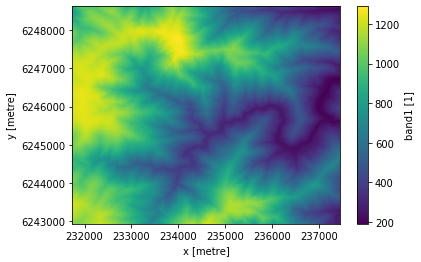

In [20]:
dem.plot();

### Highly dubious slope calculation

In [184]:
def get_slope(dem, *resolution):
    x, y = np.gradient(dem, *resolution)

    slope = np.arctan(np.sqrt(x*x + y*y)) * 180 / np.pi
    xr_slope = xr.full_like(dem, slope)
    return xr_slope

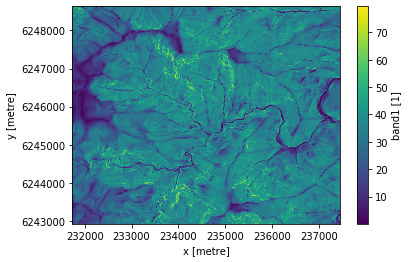

In [185]:
slope = get_slope(dem, *resolution)
slope[::2, ::2].plot();

In [186]:
resolution

(5, -5)

In [154]:
def slope_category(slope_degrees):
    if np.isnan(slope_degrees):
        return -1
    if slope_degrees < 5:
        return 0
    if slope_degrees < 11:
        return 1
    if slope_degrees < 18:
        return 2
    if slope_degrees < 26:
        return 3
    if slope_degrees < 35:
        return 4
    return 5

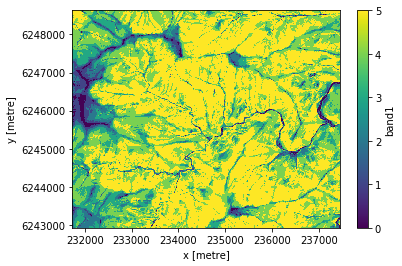

In [155]:
slope_cat = xr.apply_ufunc(slope_category, slope, vectorize=True)
slope_cat[::2, ::2].plot();

In [156]:
slope_cat_count = slope_cat.to_dataframe().band1.value_counts().rename('counts').to_frame()
slope_cat_count

,counts
5,633652
4,403139
3,144793
2,67524
1,40432
0,13482


In [25]:
import os

os.environ['GDAL_DATA']

'/usr/local/lib/python3.6/dist-packages/rasterio/gdal_data'

In [36]:
import pandas as pd
dlcd_table = pd.read_csv("dlcd.csv")

In [89]:
slope_cat_table = pd.DataFrame(
    [
        (0, 'Flat', '(0 - 5)'),
        (1, 'Undulating', '(5 - 10)'),
        (2, 'Easy Hill', '(11 - 17)'),
        (3, 'Medium Hill', '(18 - 25)'),
        (4, 'Steep Hill', '(26 - 35)'),
        (5, 'Very Steep', '(> 35)'),
    ], columns=['id', 'label', 'range']
)

In [94]:
slope_cat_table

,id,label,range
0,0,Flat,(0 - 5)
1,1,Undulating,(5 - 10)
2,2,Easy Hill,(11 - 17)
3,3,Medium Hill,(18 - 25)
4,4,Steep Hill,(26 - 35)
5,5,Very Steep,(> 35)


In [91]:
slope_cat_table.to_csv('slope_cat.csv', index=False)

In [92]:
slope_cat_table = pd.read_csv('slope_cat.csv')

In [93]:
slope_cat_table

,id,label,range
0,0,Flat,(0 - 5)
1,1,Undulating,(5 - 10)
2,2,Easy Hill,(11 - 17)
3,3,Medium Hill,(18 - 25)
4,4,Steep Hill,(26 - 35)
5,5,Very Steep,(> 35)


In [148]:
pd.merge(slope_cat_count, slope_cat_table, how="left", left_on=['index'], right_on=['id'])

,counts,id,label,range
0,633652,5,Very Steep,(> 35)
1,403139,4,Steep Hill,(26 - 35)
2,144793,3,Medium Hill,(18 - 25)
3,67524,2,Easy Hill,(11 - 17)
4,40432,1,Undulating,(5 - 10)
5,13482,0,Flat,(0 - 5)


In [145]:
slope_cat_count.index.name = 'index'

In [146]:
slope_cat_count.index

Int64Index([5, 4, 3, 2, 1, 0], dtype='int64', name='index')

In [163]:
from IPython.core.display import display

In [164]:
display(slope_cat_count)

,counts
5,633652
4,403139
3,144793
2,67524
1,40432
0,13482
